In [3]:
import pandas as pd 
import numpy as np 
import sys
import os
import matplotlib.pyplot as plt

# Load other functions
sys.path.append(os.path.abspath('../src'))
sys.path.append(os.path.abspath('../Scripts'))

from data_loader import CSVDataloader, get_file_path
from Preprocessing import Preprocessing

In [2]:
# Load credit data
data = get_file_path("oildata")
data_loader = CSVDataloader(data)
df = data_loader.load_data()

In [4]:
df

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63
...,...,...
9006,8-Nov-22,96.85
9007,9-Nov-22,93.05
9008,10-Nov-22,94.25
9009,11-Nov-22,96.37


In [5]:
# Display the first few rows and summary info
df.head()

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9011 non-null   object 
 1   Price   9011 non-null   float64
dtypes: float64(1), object(1)
memory usage: 140.9+ KB


### Data Preprocessing

In [4]:
preprocessing = Preprocessing(df)

In [6]:
#preprocessing.Date_Transaformation()

### Handling Missing Values

In [7]:
preprocessing.Handling_missing_values()

Handling Missing Value is completed.


### Handling Duplicate Values

In [8]:
preprocessing.Handling_duplicate_values()

Handling Duplicate Value is completed.
Data preprocessing completed.


,Date,Price
0,1-Apr-02,26.06
1,1-Apr-03,27.94
2,1-Apr-04,32.59
3,1-Apr-05,54.14
4,1-Apr-08,98.69
...,...,...
9006,9-Sep-94,15.93
9007,9-Sep-96,22.25
9008,9-Sep-97,18.18
9009,9-Sep-98,12.53


### EDA

C:\Users\Specter\AppData\Local\Temp\ipykernel_6548\738395518.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = df['Price'].resample('M').mean()


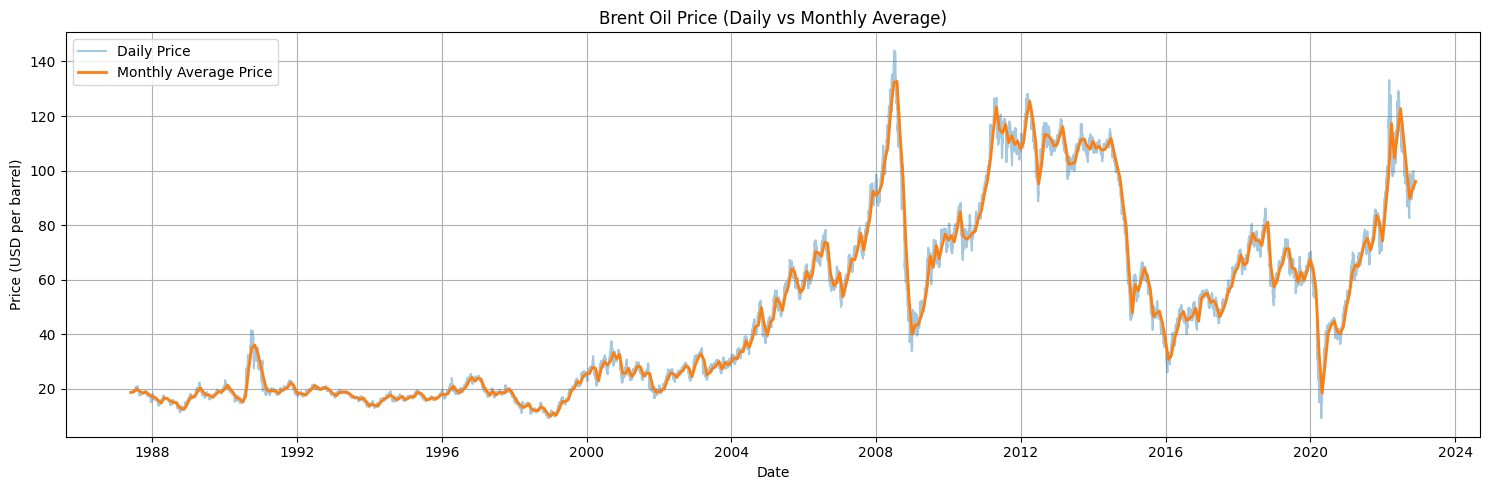

In [11]:
# Convert 'Date' to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'], format="%d-%b-%y")
df.set_index('Date', inplace=True)

# Resample to monthly average to reduce noise for change point analysis
monthly_df = df['Price'].resample('M').mean()

# Plot daily and monthly prices for comparison
plt.figure(figsize=(15, 5))
plt.plot(df['Price'], label='Daily Price', alpha=0.4)
plt.plot(monthly_df, label='Monthly Average Price', linewidth=2)
plt.title('Brent Oil Price (Daily vs Monthly Average)')
plt.xlabel('Date')
plt.ylabel('Price (USD per barrel)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
